Dataset: Jogadores da Liga Alemã de Futebol (Bundesliga).

Importando Bibliotecas

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap

Importando dataset com Pandas

In [82]:
dados = pd.read_csv("bundesliga_players.csv")

<BarContainer object of 515 artists>

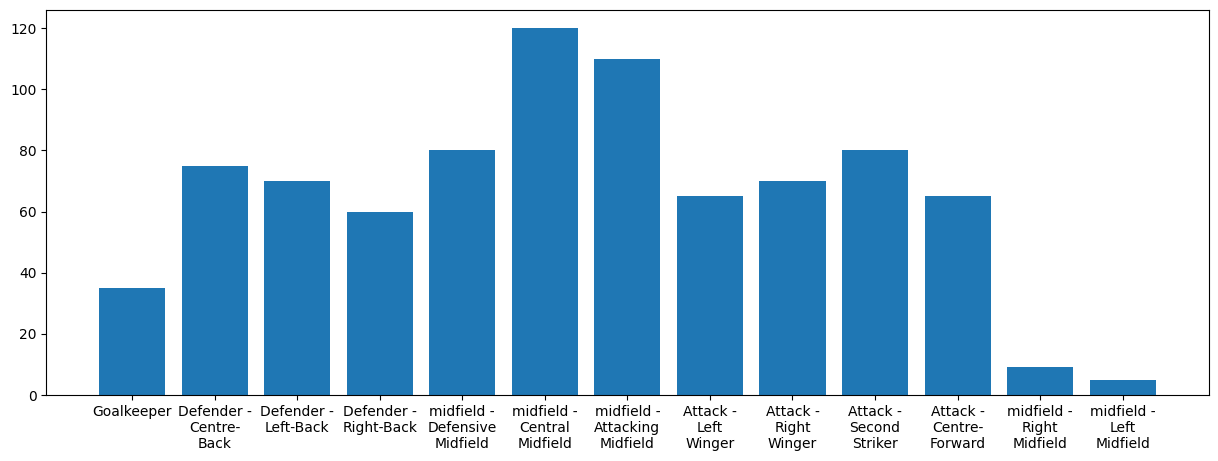

In [89]:
# Quebrar lnha em posições que tem mais de 1 palavra.
rotulos_quebrados = [textwrap.fill(pos, 10) for pos in dados['position']]

#Criação do gráfico
plt.figure(figsize=(15,5))
plt.bar(rotulos_quebrados, dados['price']);

In [10]:
dados['position'].unique()

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'midfield - Defensive Midfield',
       'midfield - Central Midfield', 'midfield - Attacking Midfield',
       'Attack - Left Winger', 'Attack - Right Winger',
       'Attack - Second Striker', 'Attack - Centre-Forward',
       'midfield - Right Midfield', 'midfield - Left Midfield'],
      dtype=object)